# Importing Required Libraries

In [88]:
import pandas as pd                   # Dataframe manipulation
import numpy as np                    # Array and Mathematical operations
import seaborn as sns                 # Data Visualization library
sns.set_style("whitegrid")            # Plots styling
import matplotlib.pyplot as plt       # Data Visualization library
import sklearn                        # Features Algorithms

# Loading Input Dataset

In [89]:
# Reading dataset into a dataframe
data = pd.read_csv("/Users/vysalidevabhaktuni/Desktop/matches.csv")
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Exploratory Data Analysis

In [90]:
# Retrieving total number of rows and columns
print(f'No Of ROWS : {data.shape[0]}')
print(f'No Of COLUMS : {data.shape[1]}')

No Of ROWS : 756
No Of COLUMS : 18


In [91]:
#Generate descriptive statistics
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [92]:
# Used to check if any null values are present in dataset
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [93]:
# Dropping null values
data = data.iloc[:,:-1]
data.dropna(inplace=True)

In [94]:
# Returns all unique values in a particular column
data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [95]:
## Replaces existing value with a new value in dataframe for Delhi Capitals
data['team1']=data['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
data['team2']=data['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
data['winner']=data['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

In [96]:
## Replaces existing value with a new value in dataframe for sunrisers Hyderabad
data['team1']=data['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['team2']=data['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
data['winner']=data['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [97]:
# Returns all the teams
data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [98]:
# Returns the count of matches won by each team
data['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Sunrisers Hyderabad             85
Royal Challengers Bangalore     82
Kings XI Punjab                 81
Delhi Capitals                  75
Rajasthan Royals                75
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

# Visualization / Data wrangling

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

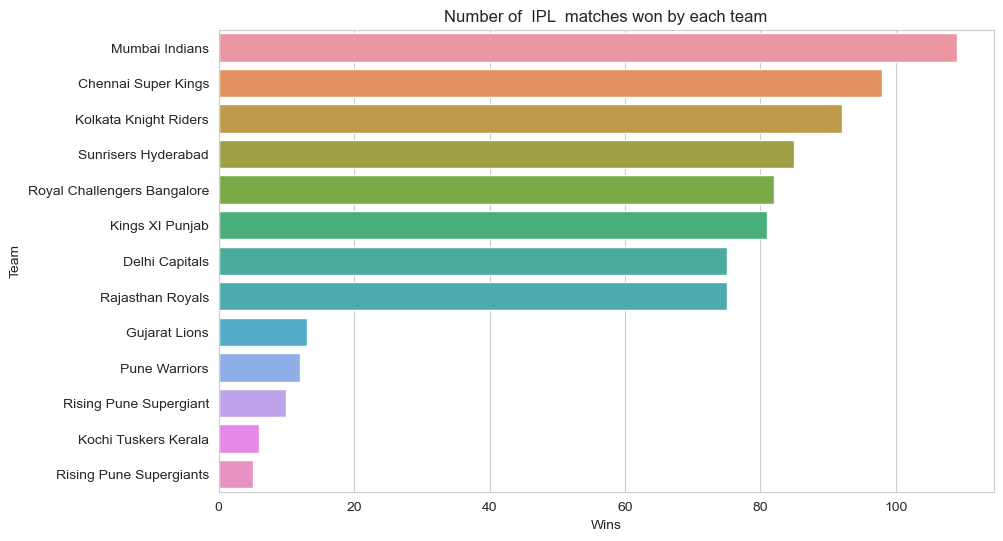

In [99]:
# Representataion of matches won by each team

# Sets width of figure to '10' and height to '7'
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = data,order= data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

In [100]:
# Returns the count of matches played in different stadium
data['venue'].value_counts()

venue
Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   70
Feroz Shah Kotla                                        66
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadiu

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

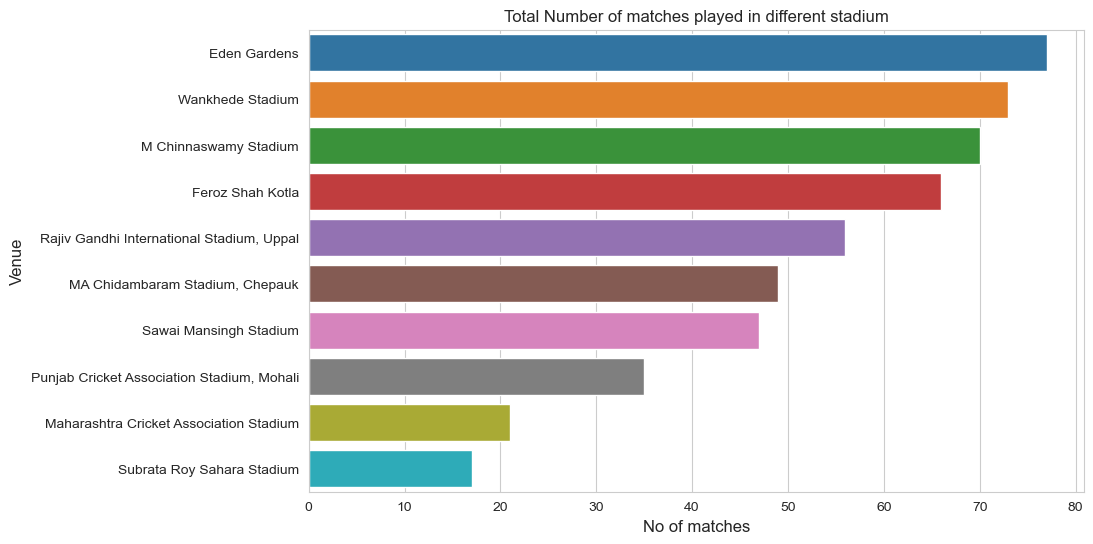

In [101]:
# Representation of the matchs played in different stadiums
plt.figure(figsize = (10,6))

# Getting first 10 stadium where the total number of matches are played each
sns.countplot(y = 'venue',data = data,order = data['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decision')

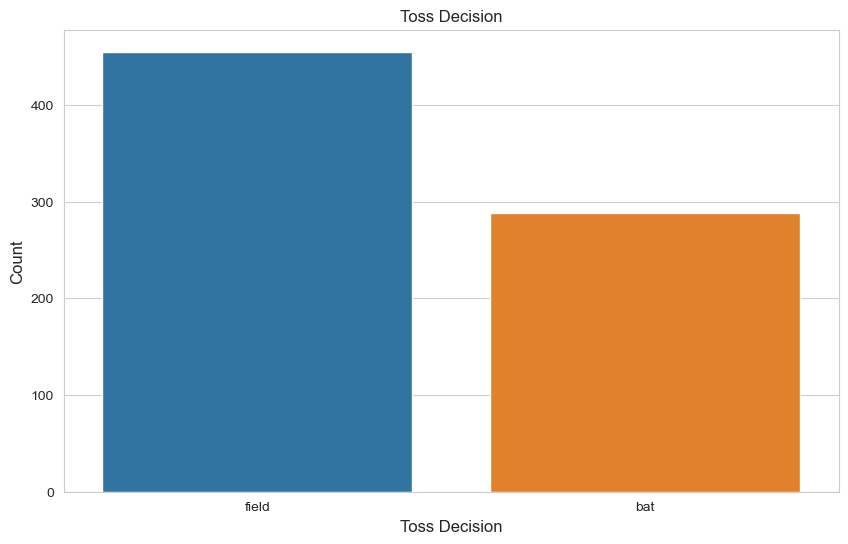

In [102]:
# Representation of toss decision
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=data)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [103]:
# Returns the count of matches played in each city
array_city = ["city"]
for i in array_city:
  print("------------ Unique cities and count of matches played in each city------------\n")
  print(data[i].unique())
  print(data[i].value_counts())

------------ Unique cities and count of matches played in each city------------

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
city
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Centurion          12
Ahmedabad          12
Visakhapatnam      12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipu

In [104]:
# Decision of toss
x = [ "toss_decision"]
for i in x:
  print("------------")
  print(data[i].unique())
  print(data[i].value_counts())

------------
['field' 'bat']
toss_decision
field    455
bat      288
Name: count, dtype: int64


In [105]:
# Returns the count of final result
x = [ "result"]
for i in x:
  print("------------")
  print(data[i].unique())
  print(data[i].value_counts())

------------
['normal' 'tie']
result
normal    734
tie         9
Name: count, dtype: int64


In [106]:
# Number of times duckworth lewis applied
x = ["dl_applied"]
for i in x:
  print("------------")
  print(data[i].unique())
  print(data[i].value_counts())

------------
[0 1]
dl_applied
0    724
1     19
Name: count, dtype: int64


# Seperating Data Into Traininga (Input) And Testing (Target)

In [107]:
# Dropping the non significant features
data.drop(["id", "Season","city","date", "player_of_match", 'umpire1', "umpire2"], axis=1, inplace=True)

In [108]:
# After droping all unnecessary data from dataset, dataset contains:
data.head()

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,"Rajiv Gandhi International Stadium, Uppal"
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,Maharashtra Cricket Association Stadium
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,Saurashtra Cricket Association Stadium
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,Holkar Cricket Stadium
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,"Rajiv Gandhi International Stadium, Uppal"


In [109]:
# Getting the row and column count after dropping the columns
print(f'No Of ROWS : {data.shape[0]}')
print(f'No Of COLUMS : {data.shape[1]}')

No Of ROWS : 743
No Of COLUMS : 10


In [110]:
#Separting the predicting attribute into y for model training 
X = data.drop(["winner"], axis=1)
y = data["winner"]

In [111]:
#Converting categorical values numerical values
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision","venue", "result"], drop_first = True)

In [112]:
# After convertion data looks like:
X.head()

,dl_applied,win_by_runs,win_by_wickets,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Pune Warriors,...,result_Saurashtra Cricket Association Stadium,result_Sawai Mansingh Stadium,result_Shaheed Veer Narayan Singh International Stadium,result_Sharjah Cricket Stadium,result_Sheikh Zayed Stadium,result_St George's Park,result_Subrata Roy Sahara Stadium,result_SuperSport Park,"result_Vidarbha Cricket Association Stadium, Jamtha",result_Wankhede Stadium
0,0,35,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,7,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,10,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,0,0,6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0,0,9,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [113]:
# Output data is a categorical value, so converting it into numerical using LabelEncoder of sklearn.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [114]:
# Spilitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

# Machine Learning Techniques:
# Random Forest Classifier Model

In [143]:
# n_estimators is number of tress in forest; 
# min_samples_split is minimum number of samples required to split an internal node;
# max_features is number of features to consider when looking for the best split

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,max_features = "sqrt")

In [144]:
# Fitting the training data
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [145]:
# Having x_test data which we use for the prediction of winner
y_pred = model.predict(x_test)

In [146]:
# # predicting the accuracy score
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(y_pred, y_test)
print("Accuracy:", ac1)

Accuracy: 0.8859060402684564


# Linear Regression Model

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [148]:
#Creating an object of LinearRegression class
model = LinearRegression()
# fitting the training data
model.fit(x_train, y_train)
#we have x_test data which we use this data for the prediction of winner. 
y_pred = model.predict(x_test)
# Calculating accuracy
ac2 = r2_score(y_test, y_pred)
print("Accuracy:", ac2)

Accuracy: 0.35134478231874344


# Decision Tree Classifier Model

In [149]:
from sklearn.tree import DecisionTreeClassifier
#Creating an object of DecisionTreeClassifier class
model = DecisionTreeClassifier()
# fitting the training data
model.fit(x_train, y_train)
#we have x_test data which we use this data for the prediction of winner. 
y_pred = model.predict(x_test)
# Calculating accuracy
from sklearn.metrics import accuracy_score
ac3 = accuracy_score(y_pred, y_test)
print("Accuracy:", ac3)

Accuracy: 0.8657718120805369


# Lasso Regression Model


In [150]:
from sklearn.linear_model import Lasso

In [151]:
model = Lasso(alpha=0.1)
# Fitting the training data
model.fit(x_train, y_train)
#we have x_test data which we use this data for the prediction of winner. 
y_pred = model.predict(x_test)
# Calculating accuracy
from sklearn.metrics import accuracy_score
ac4 = accuracy_score(y_pred.round(), y_test)
print("Accuracy:", ac4)

Accuracy: 0.14093959731543623


# Ridge Classifier Model

In [152]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [153]:
ridge = RidgeClassifier(alpha=1.0)
# Fitting the training data
ridge.fit(x_train, y_train)
# x_test data which we use this data for the prediction of winner.
y_pred = ridge.predict(x_test)
# Accuracy calculation
ac5 = accuracy_score(y_test, y_pred)
print("Accuracy:", ac5)

Accuracy: 0.5637583892617449


# Elastic Net Regression Model

In [154]:
from sklearn.linear_model import ElasticNet

In [155]:
model = ElasticNet(alpha=0.5, l1_ratio=0.5, max_iter=10000)
#Fitting the model
model.fit(x_train, y_train)
# x_test data which we use this data for the prediction of winner.
y_pred = model.predict(x_test)
#Calculating accuracy
from sklearn.metrics import accuracy_score
ac6 = accuracy_score(y_test, np.round(y_pred))
print("Accuracy:", ac6)

Accuracy: 0.087248322147651


# Creative Analysis Of Data

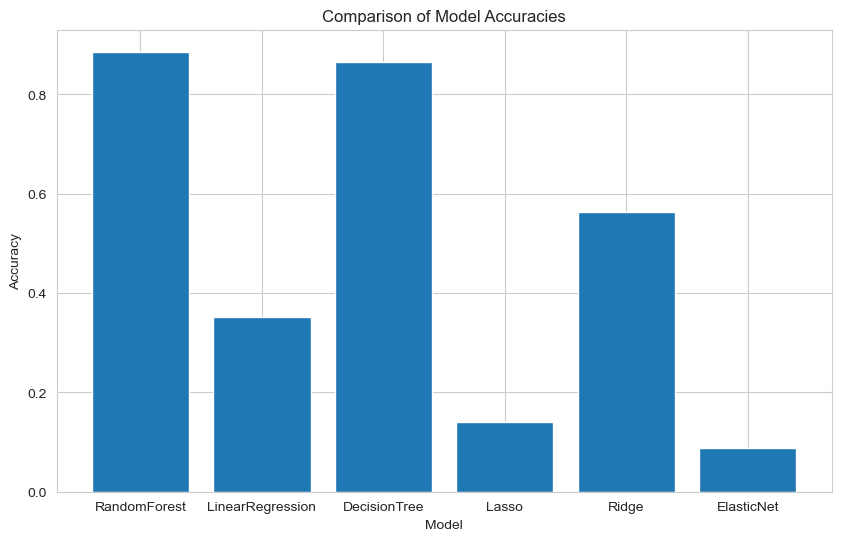

In [156]:
import matplotlib.pyplot as plt

# Accuracy scores
scores = [ac1, ac2, ac3, ac4, ac5, ac6]

# Model labels
labels = ['RandomForest', 'LinearRegression', 'DecisionTree', 'Lasso', 'Ridge', 'ElasticNet']

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, scores, color='tab:blue')

# Set the title and labels
ax.set_title('Comparison of Model Accuracies')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')

plt.show()
